In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

=================================================================================================================
# Lecture Notes: Model Selection


##### D.Vidotto, Data Mining: JBI030 2019/2020


=================================================================================================================

As you may have noticed, in the past lecture we have trained *k-nearest-neighbors* and *logistic regression* models on a subset of the dataset called *training data*, and evaluated it with several performance measures on the *test data*. In this lecture, we are going to explore why this step is necessary. In particular, we are going to introduce a very important concept in Data Mining and statistical learning in general: the *Bias-Variance* tradeoff. Understanding this concept is crucial to understand how to perform model selection, and how to tune what are called the *hyperparameters* of the models we will explore in the rest of the course. We will see two strategies that will help us to perform the tuning step: the *Holdout method* and *Cross-Validation*.  
<br>
This lecture is structured as follows:

 1. some important definitions 
   * signal/noise 
   * overfitting/underfitting
   * bias-variance tradeoff
   * model complexity
   * model hyperparameters
   * training/testing errors
 1. model selection and validation strategies 
   * Holdout method 
     * standard split
     * stratified split
   * Cross-Validation
     * standard cross-validation
     * stratified cross-validation
     * leave-one-out cross-validation 
   * grid search and random search  

## 1. Some Important Definitions 

**Signal and Noise**. 

<br>
"<i>The signal is the truth. The noise is what distracts us from the truth."</i><sup>1</sup><br>
<sup>1</sup>N.Silver (2012). <i>The Signal and the Noise.</i> Penguin Group.

<br>

When we observe the raw data, we must be aware that not all the information contained in such data is relevant. Indeed, we can decompose the data in this way: 

$$Data = Relevant + Irrelevant Information$$

which can also be rewritten as 

$$Data = Signal + Noise$$

Therefore, we can define the **Signal** as that part of relevant information that is present in the data (the one that is of interest for our business goal/research question), and that we want to uncover. Conversely, the **Noise** is the (unavoidable) component of irrelevant information (for our goal at hand) that is present in the data. In order to discover the signal, we implement different Data Mining models on the dataset, hoping that one of them will result useful for our purposes.
***
**Overfitting and Underfitting**. However, when we train an algorithm on a dataset, it is not certain at all whether what we are fitting is the right model; and the same can be said even when we try multiple algorithms. In particular, there are two types of mistakes that an algorithm can do when training a model: 
 
 1. it can ignore important aspect of the data, that are relevant for our business goal; 
 1. it can learn too closely from the given data points, so that it doesn't know how to generalize to new ones. 
 
In general, in case (1) the noise is disregarded by the model, but the model is so "concerned" to ignore it that even (part of) the signal is discarded. This is also known as **model bias**, and in general it happens when we are trying to train a too simple model for the data and research question at hand. On the other hand, in case (2) the model is too concerned to learn so many aspects of the data, that it learns the data points 'by heart'; thus, when presented -in the model implementation stage- to new data, it fails to correctly recognize how to behave with them, which increases the likelihood to perform wrong predictions. When the model is discarding relevant part of the signal in the data is said be **underfitting**; when, on the other hand, the model is learning the training examples too closely is said to be **overfitting**. Of course, there exist models in the middle between under- and over-fitting ones; those models should be the ones achieving best performance when performing predictions on a new set of data, and are the ones that we are seeking. 
***
**Bias-Variance tradeoff**. In case (1) above, the model will produce in general wrong (but rather stable across different samples) predictions (hence it is a *low variance, high bias* case). On the other hand, models in case (2) will fit very closely the training data (hence low bias), but the predictions become highly unstable (high variance) if trained on a different sample, and won't generalize well on new data. We are going to see an example of biased and unstable algorithms shortly.

Ideally, we would like to minimize both bias and variance simultaneously. However, this is not possible, as models with decreasing[increasing] bias have increasing[decreasing] variance. This can be explained mathematically. The *expected MSE* (mean squared error) of a new point $(x^*,y^*)$, predicted by an already trained model to be $\hat{f}(x^*)$ when in reality it should be $f(x)$, is (the solution requires a couple of simple algebraic steps): 

<br>

$$ \mathbb{E}[(y^* - \hat{f}(x^*))^2] = (Bias[\hat{f}(x^*)])^2 + Var[\hat{f}(x^*)] + Var(e^*)$$


where:

 * $Bias[\hat{f}(x^*)] = \mathbb{E}[\hat{f}(x^*)]-\mathbb{E}[f(x^*)]$ is the model **bias** introduced above; it captures that part of error given by the simplifying assumptions of the model w.r.t. the true function (for instance, when modelling non-linear data (true function:$f(x^*)$) with linear models (estimated function:$\hat{f}(x^*)$) (Bias is part of the *reducible error*; it can be lowered by using a more complex model or perhaps by increasing the number of features)
 
 
 
 * $Var[\hat{f}(x^*)] = \mathbb{E}\{(\hat{f}(x^*)-\mathbb{E}[\hat{f}(x^*)])^2\}$ represents the **variance** of the estimator itself; that is, how much would the prediction vary across different training samples? (For example, linear models are in general rather stable, while more complex models have higher variance) (Variance is part of the *reducible error*; it can be lowered by adding more training points or by reducing model complexity)
 
 
 
 * $Var(e^*) = \mathbb{E}\{(y-\mathbb{E}[f(x^*)])^2\}$ is the *irreducible error*, which represents the **noise** (=the difference between the true function $f(x^*)$ and the actual observation); this is that part of the error that cannot be captured by the model, under which the error test cannot lie, as it is intrinsic in the data  (If this error is large, it might be lowered only with data cleaning, adding new features to the dataset, and so on).
 
 
This formula is also known as *Bias-Variance decomposition* of the expected error. It shows us how the expected test error is decomposed, and it represents a *tradeoff* between model accuracy (bias) and model stability (variance). This tradeoff is known as **Bias-Variance Tradeoff**. Models with high variance (and low bias) are said to be **overfitting**, while models with high bias (low variance) are usually **underfitting**. The goal in Data Mining is to find a model that is in between, that is, it is not too biased, but at the same time not too unstable (as mentioned above, unfortunately it is not possible to obtain both simultaneously). Consider the following examples in which we try to predict a continuous output $y$ with a numeric feature $x$ (thus we are in a *regression setting*): 



<img src="./img/model_selection/bias_variance_1.png" width="800" />


There are three models trained (fitted) to the same dataset: a linear regression model, a polynomial regression model with degree 3 (a *polynomial regression* model simply exponentiate the feature $x$ to a given degree, and then fit a linear model on such new features); and a polynomial regression model with degree 10. Could you recognize which model is underfitting, which one is overfitting, and which one represents the best fit? <br>


The "true" signal in the preceding example was a polynomial of degree 3 (since data were artificially simulated, the true generating function was known). It is clear, then, that a linear regression appears to make too strict assumptions on the dataset, while a polynomial of degree 10 is left too "free" to vary. 


We are now going to see how *biased models* (left plot above) remain stable across different samples, while *unstable models* (right plot above) can vary significantly their predictions across different samples. The following plots show two different datasets (samples) generated from the same signal as before, on which the same underfitting and overfitting models used above are trained:   
<img src="./img/model_selection/bias_variance_2.png" width="700" height="50"/>


As you can see, the simple model is consistenlty biased (it doesn't pick up all relevant aspects in the signal), but it always fits a straight line (although with different slopes and intercept); the model on the right, instead, is more wiggly, and it tries to learn every time  different aspects of the dataset, resulting in dramatically different predictions. What we are observing here in a regression setting also happens in classification: the simpler the classifier, the "smoother" the decision boundary will be (and the higher the probability of underfitting); the more complex the classifier, the more wiggly and close to the data points the decision boundary. 

Whether a model is under/over-fitting is also a function of the sample size: the larger the training sample size, the more complex the model is "allowed" to be, and the true function will be recovered correctly (however, the higher the complexity of the algorithm we train, the larger the sample size required to retrieve the true $f(x)$). In the following plots, you can see the same data generated in the previous example, where a polynomial regression of degree 10 is fitted with different sample sizes: n=35, n=100 and n=150.  
<img src="./img/model_selection/bias_variance_3.png" width="700" height="1000"/>

Therefore, the larger the sample size, the more an overfitting model can "adjust" towards the true function. In reality, however, we don't know the true generating function, nor we know what is the correct sample size for the model we are fitting; therefore, we need to operate in a different manner. The way to go is by "manually" regulating the *model complexity*. 

***

**Model Complexity**. So far we have encountered the term *complexity* of a model, without really defining it. From the plots seen above, it should be quite intuitive now. Model complexity refers to the *degree of flexibility* of a model, that is, how much the model is able to learn. Simplest models try to memorize very basic aspects of the data (such as a linear function, or a linear decision boundary). More complex models, instead, are capable of memorizing more complex relationships. As we have seen above, however, too complex models run into the risk of learning too closely from the training data points (without generalizing well to new ones). Therefore, increasing model complexity corresponds to increasing its variance (and reducing bias), while decreasing model complexity corresponds to increasing its bias (and reducing variance). 

In general, increasing the complexity of the model also means decreasing its interpretability, and vice versa. *Interpretability* of a model refers to the human ability to interpret the results of a Machine Learning algorithm; for example, interpreting the regression coefficients of a linear regression model. For this reason, highly complex models (which could be most suitable for some datasets) are also known to be *black-box* models, as they are of difficult interpretation; for such algorithms, we will mostly be interested in their black-box predictions.

But how do we determine the complexity of a model? It turns out that each model can be controlled by the experimenter by regulating its *hyperparameters*. 

*** 

**Model Hyperparameters**. The hyperparameters of a model are parameters that control model complexity. They are called like this because they operate *on top* of the normal model parameters; that is, the specific values of the hyperparameters of a model will affect the values of the trained parameters, and consequently the model predictions (for *non-parametric* models, hyperparameters directly influence the predictions). In these notebooks and during the lectures, sometimes we may call the hyperparameters with the name of *parameters*, as a short-hand; we will generally refer to hyperparameter, though. The distintiction will be clear from the context.

The polynomial degree chosen for the input features above is an example of hyperparameter; as you could have noticed, modifying such hyperparameter drastically changed the predictions of the model. Another example of model hyperparameter is the number of neighbors $k$ in k-Nearest-Neighbors (a model introduced during the last lecture, and that we will encounter again later on). A further example of hyperparameter is the number of input features used to train a regression model. 

Let's see now an example of how the hyperparameters affect the predictions in a classification example. Once again, we will use synthetic data to show this principle. The example below show the different *decision regions* and *decision boundaries* estimated by k-Nearest-Neighbors with varying number of neighbors: 1, 15, and 50. 
<img src="./img/model_selection/knn_dec_bound.png" width="1500" height="100"/>

Lower values of $k$ lead to a more "wiggly" decision boundary, while larger values lead to a smoother one. What do you think that this means? Does increasing $k$ lead to a simpler or more complex models? 

As we will see, each algorithm has its own set of hyperparameters. Hyperparameters of a model is not something that is learned by the algorithm in the *training stage* (see next subsection), but it is something that we, as users, must set beforehand. Our role as data scientists is to try out different values of the hyperparameters, and find out which one leads to the best performance: such optimal value, of course, can vary from dataset to dataset. To be able to tune the hyperparameters we need to be able to understand the difference between *training* and *testing* stage. 

***
**Training and Test Errors**. In the previous lecture, we have used a *training dataset* to train the algorithms (training means learning the parameters of the algorithm, given a value of the hyperparameters), and a separate *test set* to evaluate how it generalizes (for example, with the RMSE or the $f_1$ score). This is a crucial point in Data Mining and Machine Learning: if we evaluated the algorithm with the same set of data points used for training (called *training set*), we would be able to detect when the algorithm is underfitting, but not when the algorithm is underfitting. This is because, as we increase model complexity, the error on the training set (which, by the way, is known as **training error**) becomes smaller and smaller, approaching $0$ (or, to be more precise, the irreducible error). This makes sense, intuitively: an overfitting model learns so closely the training data points that their error keeps decreasing. On the other hand, an underfitting model never fits well the data points, leading to a large error also when evaluated on the training data . 

In contrast, assessing the performance of the algorithm with a new set of data (called *test set*) can help us to identify when the algorithm is generalizing well. This step is called *testing stage* or *inference*. In particular, given a specific value of the hyperparameters, we can understand whether we are in an under/over-fitting regime by comparing the performance on the test set (which provides us with an estimate of the **test error**) and training set. 

The following graph represents the relationship between model complexity, training error, test error, bias and variance: 

<img src="./img/model_selection/test_train_errors.png" width="700" height="100"/>

From the plot we can infer the following points: 

* when the algorithm is underfitting, the training error is close to the test error, and they are both large; in this case, model bias is large and model variance is low. The model doesn't learn enough from the training dataset, and therefore cannot generalize well either

* when the algorithm is overfitting, the training error is small and the test error is large again; here, variance is small and bias is large. The model learns too closely the training data, and cannot generalize well to the test points 

* the test error has an approximate U-shape: it is large at the extremes, where either bias or variance are large (i.e., when the model does not learn enough or when it learns too much from the training data), but it reaches a minimum (a "sweet spot") somewhere in the middle, when the levels of bias and variance both reach a reasonable compromise; ideally, this is the model we should be able to detect, and that can be achieved with a proper tuning of the hyperparameters

* the errors leading to this shape of the curve are measures those that we seek to minimize: miss-classifications, RMSE, MAE, and so on. For measures that we want to maximize, such as accuracy, $R^2$, $f_1$, etc. the plot will be symmetrical ($\cap$-shape rather than $U$-shape of the metric curve on the test set), but the principles explained here still hold

* the training error should (at least in theory) always be larger than the test error; this makes sense, as the model model learns better the data points used in the training stage than a set of points that has never seen before 

In the next section we are going to see how to perform model tuning (a.k.a. model selection) and validation. Let's conclude here by observing how training and test error behave on a simulated dataset. In particular, we are going to implement it on a two-classes example, with 1000 examples (80% of which will be retained in the training set, and the reamining ones will go to the test set) and 30 features (only 3 of such features are actually significant predictors for the classification task). We will try values for $k$ ranging between 1 and 100. 

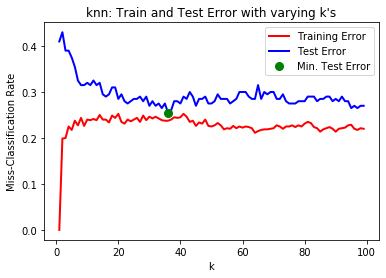

In [2]:
from sklearn.datasets import make_classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=30,
                           n_informative=3, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,
                           class_sep=.6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


k_values = np.arange(1, 100, 1)
train_error = []
test_error = []

for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Note: miss-classification error = 1 - accuracy
    train_error.append(1-knn.score(X_train, y_train))
    test_error.append(1-knn.score(X_test, y_test))
    

plt.plot(figsize=(10,5))
plt.plot(k_values, train_error, "r-", linewidth=2, label="Training Error")
plt.plot(k_values, test_error, "b-", linewidth=2, label="Test Error")
plt.plot(k_values[np.argmin(test_error)], np.min(test_error), "og", markersize=8, label="Min. Test Error") 
plt.xlabel("k")
plt.ylabel("Miss-Classification Rate")
plt.title("knn: Train and Test Error with varying k's")
plt.legend()
plt.show()

The minimum test error (best hyperparameter value) is achieved when $k=36$:  

In [3]:
best_k = k_values[np.argmin(test_error)]
best_k

36

## 2. Model Selection and Validation Strategies

### 2.1 Holdout Method
In absence of a separate test set on which to evaluate the generalization ability of a regressor/classifier, it is necessary to create one 'manually'. The solution comes by (randomly) splitting the data into a train and a test set. This can be done automatically with the `train_test_split` function of `sklearn` (when performing this operation, it is important to set the `random_state` parameter in order to obtain reproducible results). Thus, the training data can be used for model training, and the test data for model tuning/evaluation. This method is known as **holdout method**. 

However, using only a test set to tune the model and evaluate it can be misleading. For the same reason for which we cannot use the training set to evaluate a model, we cannot rely on a unique test set to perform both tuning and performance evaluation. This is because the selected hyperparameter might be tailored to the specific data points present in that test set, leading to an overly optimistic perfomance measure. In this way, when implemented on new data, the algorithm performance might deteriorate.

There is a workaround for this: instead of splitting the data into train/test sets, we can split it into three subsets: the train/validation/test sets. These three sets can be used as follows: 

1. train the algorithm (with different hyperparameter values in case of tuning) on the training set 
1. evaluate all the trained algorithms on the validation set; in this way, the validation set can be used to select the best model hyperparameter (and obtain a first estimate of the model performance)
1. once the best model has been picked, assess the prediction performance by retraining it on the training+validation set, and testing it on the test set 


<img src="./img/model_selection/holdout.png" width="700" height="100"/>


Typical split ratios are: between 50-70% for the training set, and between 15-25% for validation and test set. This, of course, depends on the dataset size. 

While the holdout is recommened in regression settings, it can lead to unbalanced (or mis-represented) classes in classification. In the figure above, we can see that -due to the randomness of the split- the positive (blue) class is over-represented in the training set, and not present at all in the test set (where there are only instances from the red class). This, in turn, will lead to misleading performance metrics. 

A solution can be found by performing stratified random sampling, where the stratum variable is given by the class. In this way, it is ensured that each class retains its original proportions within each subset. 

<img src="./img/model_selection/stratified_holdout.png" width="700" height="100"/>

We are going to see now how to perform stratified holdout with the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) provided by `sklearn`. Such dataset has 3 classes. Notice, in both cases, the use of the `stratify` parameter. (Normal holdout, without stratification, can be implemented simply by omitting the `stratify` argument). We will perform a 60/20/20 split (note that for the validation set size, 0.2/0.8=0.25). 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(X, y, 
                                                              test_size=0.2, 
                                                              stratify=y,
                                                              random_state=1)
# validation_size = 0.2 / 0.8  
X_train, X_valid, y_train, y_valid = train_test_split(X_trainvalid, y_trainvalid, 
                                                      test_size=0.25, 
                                                      stratify=y_trainvalid,
                                                      random_state=1)

original_size = X.shape[0]
train_size = X_train.shape[0]
validation_size = X_valid.shape[0]
test_size = X_test.shape[0]
(original_size, train_size, validation_size, test_size)

(150, 90, 30, 30)

Let's check the class distribution within each split:

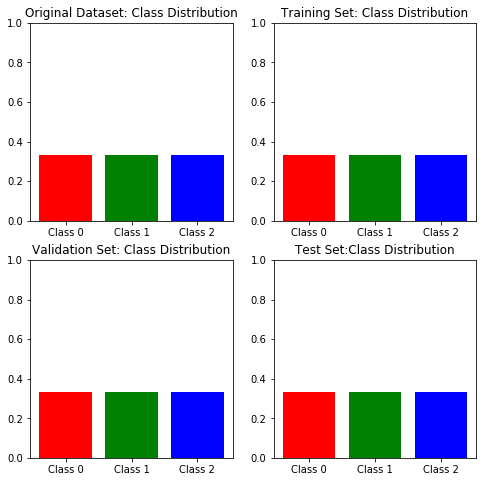

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.bar(np.unique(y), np.unique(y, return_counts=True)[1]/original_size, 
       color=("red", "green", "blue"), 
       tick_label=("Class 0", "Class 1", "Class 2"))
plt.ylim(0,1)
plt.title("Original Dataset: Class Distribution")

plt.subplot(222)
plt.bar(np.unique(y_train), np.unique(y_train, return_counts=True)[1]/train_size, 
       color=("red", "green", "blue"), 
       tick_label=("Class 0", "Class 1", "Class 2"))
plt.ylim(0,1)
plt.title("Training Set: Class Distribution")

plt.subplot(223)
plt.bar(np.unique(y_valid), np.unique(y_valid, return_counts=True)[1]/validation_size, 
       color=("red", "green", "blue"), 
       tick_label=("Class 0", "Class 1", "Class 2"))
plt.ylim(0,1)
plt.title("Validation Set: Class Distribution")

plt.subplot(224)
plt.bar(np.unique(y_valid), np.unique(y_valid, return_counts=True)[1]/test_size, 
       color=("red", "green", "blue"), 
       tick_label=("Class 0", "Class 1", "Class 2"))
plt.ylim(0,1)
plt.title("Test Set:Class Distribution")

plt.show()

Let's now assess the validation and test accuracy of knn (with `k` varying between 1 and 20) on this dataset:

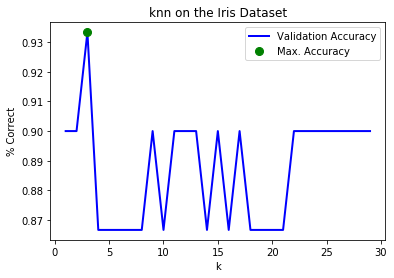

In [6]:
k_values = np.arange(1, 30, 1)
validation_accuracy = []

for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    validation_accuracy.append(knn.score(X_valid, y_valid))
    

plt.plot(figsize=(10,5))
plt.plot(k_values, validation_accuracy, "b-", linewidth=2, label="Validation Accuracy")
plt.plot(k_values[np.argmax(validation_accuracy)], np.max(validation_accuracy), "og", markersize=8, label="Max. Accuracy") 
plt.xlabel("k")
plt.ylabel("% Correct")
plt.title("knn on the Iris Dataset")
plt.legend()
plt.show()

The validation accuracy is 0.933 on the validation set, with $k=2$. We now retrain the model with $k=2$ on the training+valdation set, and evaluate it on the test set: 

In [7]:
knn_selected = KNeighborsClassifier(n_neighbors=2)
knn_selected.fit(X_trainvalid, y_trainvalid)
knn.score(X_test, y_test)

0.8666666666666667

The final accuracy, 0.867, is (expectedly) lower on the test set.

**Note**: never use the test set for model selection/tuning. This subset has the only purpose to assess model performance, once the best model has been picked. A large discrepancy between validation and test error should lead us to reconsider the data preprocessing/model building stage, and start it from scratch if necessary. 

### 2.2 Cross-Validation
An alternative to the holdout method (particularly useful when the dataset is of limited size) is provided by **k-fold-cross-validation**. With this method, instead of partitioning the dataset into a training and validation set, we (randomly) split it into $k$ subsets (called folds). (Do not confuse the $k$ of k-nearest-neighbors with the one of cross-validation!) Iteratively, we retrain the model $k$ times, each time using a different fold as validation set and the remaining $k-1$ folds as training set. This will lead to $k$ different perfomance values (accuracy, error rates, RMSEs, $f_1$ scores, etc.); the final *cross-validation* estimate (which is an estimate of generalization performance) is given by a simple average of these $k$ values. There are no strict rules on how to choose $k$; typical values are $k=5$ and $k=10$ (in `sklearn`, the default value is $k=3$).

Therefore, cross-validation works as follows: 

* First, use fold 1 as test set, and from fold 2 to (k-1) as training set
* Next, use fold 2 as test set, and folds 1,3,...,(k-1) as training set
* Continue until all k folds are used as test set
* Compute the $k$ evaluation scores, and average them 

Exactly as we have seen for the holdout method, cross-validation can be performed with and without stratification (standard CV is applied in regression, while stratified CV in classification). In the following image, an example of stratified cross-validation is represented. As always, it is preferable to keep a separate test set aside, which will play the same role that we have seen in the holdout method.  

 <img src="./img/model_selection/stratified_cv.png" width="700" height="100"/>
 
Advantages and disadvantages of CV (compared to holdout): 

 * it offers a more realistic estimate of the generalization performance, since the model is tested on $k$ different subsets of the data, instead of just one 
 * all data points appear in the validation set once
 * it offers an estimate of the variability of the performance measure (it can be the standard deviation of the measures across the $k$ folds) 
 * more data points are used for training
 * main disadvantage: computational (each model must be retrained $k$ times) 
 
`sklearn` provides us with a function that automatically performs cross-validation for us: `cross_val_score()`. This function takes as main arguments:
 * estimator: the algorithm to evaluate
 * X, y: the features and output variable
 * scoring: the performance measure with which we want to evaluate algorithms
 * cv: if *integer*, the number of folds, which is 5 by default (if the estimator is a classifier, the function automatically performs stratified cross-validation); otherwise, it can be passed in a form of splitter, such as `KFold` or `StratifiedKFold`
 
 The function returns a $k$-dimensional vector of scores. The splitters `KFold` (recommended in regression) and `StratifiedKFold` (recommended in classification) take the following arguments: 
  * n_splits: the number of folds

They create the training/validation sets for each fold. 

We are now going to see how to perform cross-validation, still using the *iris* dataset. We will perform 5-fold-CV, and will evaluate k-nearest-neighbors with $k=10$. The evaluation will occur with the macro-averaged $f_1$ scores.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# We set apart 10% of the data for the test set
X, y = load_iris(return_X_y=True)
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(X, y, 
                                                              test_size=0.1, 
                                                              stratify=y,
                                                              random_state=1)
# Create 5 folds for cross-validation
cv_splits = StratifiedKFold(n_splits=5)
# Make f1_macro score for the input of cross_val_score
f1_macro = metrics.make_scorer(metrics.f1_score, average='macro')

# Perform cv and compute the f1 scores
f1_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                           X_trainvalid, y_trainvalid, 
                           scoring=f1_macro,
                           cv=cv_splits)

# Print cross-validation scores (with 1-sd bounds):
print("Cross-Validated Macro f1-scores: %0.2f (+/- %0.2f)" % (f1_scores.mean(),
                                                            f1_scores.std()))

Cross-Validated Macro f1-scores: 0.98 (+/- 0.02)


In [9]:
f1_scores

array([0.9628483, 0.9628483, 1.       , 0.9628483, 1.       ])

In [10]:
# Retrain model on whole dataset and report test error: 
knn_test = KNeighborsClassifier(n_neighbors=10)
knn_test.fit(X_trainvalid, y_trainvalid)
print("Test-set f1-score: %0.2f" % metrics.f1_score(y_test, knn_test.predict(X_test), 
                                                    average='macro') )

Test-set f1-score: 0.93


If no scoring function is passed as argument, the estimator's default score is used (for classifiers this is the accuracy): 

In [11]:
# Create 5 folds for cross-validation
cv_splits = StratifiedKFold(n_splits=5)
# Perform cv and compute accuracies
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                           X_trainvalid, y_trainvalid, 
                           cv=cv_splits)

# Print cross-validation scores (with 1-sd bounds):
print("Cross-Validated accuracies: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                         scores.std()))

Cross-Validated accuracies: 0.98 (+/- 0.02)


If no splitter is given, but an integer, `cross_val_score` automatically performs cross-validation using that integer as number of folds:

In [12]:
# Perform 5-fold-cv (without using the KFold splitter) and compute accuracies:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         X_trainvalid, y_trainvalid, 
                         cv=5)

# Print cross-validation scores (with 1-sd bounds):
print("Cross-Validated accuracies: %0.2f (+/- %0.2f)" % (scores.mean(),
                                                         scores.std()))

Cross-Validated accuracies: 0.98 (+/- 0.02)


As you can see, the results are the same. There exists also a function, `cross_val_predict` (documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)), that returns cross-validation predictions. With k-nearest-neighbors and $k=10$, this function can be called as follows: 
```
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(KNeighborsClassifier(n_neighbors=10), 
                                   X_trainvalid, y_trainvalid, 
                                   cv=5, method="predict")
```

In this function (like in cross_val_score), `cv` can take a splitter such as KFold and StratifiedKFold. You can also specify `method="predict_proba"`, in which case the estimated probabilities of each class are returned. The latter can be useful, for instance, to evaluate confusion matrices, ROC and Precision/Recall curves, etc.) of binary classifiers. 

**Leave-one-out-cross-validation**. Another typical choice for $k$ in Cross-Validation is given by setting $k=n$, where $n$ is the number of observations in the dataset (excluding test data). In this case, we have as many folds as observations, which means that at each cross-validation iteration we use $n-1$ training data. While the method can be computationally expensive (as we have to train $n$ models), it can lead to more accurate results, especially with limited sample sizes. 

In [13]:
## Example of leave-one-out CV: 
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         X_trainvalid, y_trainvalid, 
                         cv=loo)
print("Leave-one-out accuracies: %0.2f (+/- %0.2f)" % (loo_scores.mean(),
                                                       loo_scores.std()))

Leave-one-out accuracies: 0.98 (+/- 0.15)


**Other Cross-Validation strategies**. There are other cross-validation strategies that can be implemented: 

* shuffle the data first, and then perform the split; this method will first randomly permute the rows of the dataset, and subsequently will create the folds. It can be activated by setting `shuffle=True` in `KFold` or `StratifiedKFold` (remember to set the `random_state` for reproducibility)
* shuffle-split cross-validation: sample an arbitrary number of points for training and validation set, for a pre-specified number of iterations, and then train the algorithms; this method is performed with the `ShuffleSplit` function of sklearn
* group cross-validationl; if the data are clustered between groups (for examples, students within schools), it is possible to perform group-specific cross-validation (so that some groups are in the training set, and others in the validation set); the function for this type of split in sklearn is `GroupKFold` 
* nested cross-validation, which consits of performing an outer loop (in which the test set is rotated) and an innter loop (in which the validation set is rotated). It can be called via `cross_val_score(GridSearchCV())`, for instance; it is more useful for generalization performance estimation than model tuning

You can find more in the [documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

**Other remarks on Holdout method and Cross-validation**. 
* Remember to use the validation set(s) for model tuning and comparison, and the test set only once you have picked the best model. Among the operation that we should perform with the validation set/cross-validation results, we find: (a) tuning (b) model comparison (c) ROC/Precision-Recall curve evaluation (d) choosing an operating point in the ROC/PR curve, and so on. 
* Once the test set has been set apart, it could seem natural to perform data processing on the remaining part of the data (training+validation) before performing holdout/cross-validation. However, this sequence might easily yield too optimistic results (for example, too large accuracies or too low generalization error estimates). The cause of this behaviour is that we use values of the validation set to modify the training set (for instance, when we perform median imputation of missing data). Instead, we should each time pretend to be in a situation where we only know the training data, and the validation set is not yet known to us. The correct way to go is: (a) perform the splits; (b) perform data preprocessing on the subset assigned for training (in Cross-Validation, this must occur for each cross-validation iteration); (c) use the parameters used to pre-process the training data in step (b) to transform the validation set; (d) perform training and predictions on these pre-processed data. Operations of pre-processing also include feature selection and adjusting class imbalance (with oversampling, for instance). Fortunately, `sklearn` provides us with pipelines that allow to directly incorporate such steps in the holdout/cross-validation routines. In example 2 of the notebook "Cross-Validation in Practice" we will see an example on how to perform feature selection with cross-validation. 

### 2.3 Grid and Random Search 
**Grid Search**. We have seen an example of grid search above, when discussing the holdout method with knn. Grid search is a method to perform model tuning; it consists of the following steps: 

1. specify a grid of values for the sets of hyperparameters; the algorithms of step 2 will use such values to train the models 
1. for each value specified in the grid, train the algorithm and evaluate it on the validation set (alternatively, evaluate it with cross-validation) 
1. choose the hyperparameter value which leads to best results (e.g., highest accuracy, lowest RMSE, and so on)

If it is not sure what values to specify for the initial grid, it is possible to search first across more distant values, in order to have an idea about the *order of magnitude* of the hyperparameter; and then refine the search by looking for values closer to the best performing ones in the previous search. This is known as *telescopic search*. 

With cross-validation, it is also possible to use the *One-Standard-Error-Rule*: it consists of picking the most parsimonious (=simplest) model whose performance is not 1 standard error beyond the performance measure of the best one. For reference, see [page 244 of The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf). 

Here is an example on how to perform grid search with 5-fold-Cross-Validation, in order to pick the best `k` for k-nearest-neighbors with `scikit-learn`. 

In [14]:
# Telescopic search: we first search for the order of magnitude, and then refine the search 
grid_init = [1, 20, 50, 100]
best_accuracy = 0 

for k in grid_init: 
    knn_tmp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_tmp, X_trainvalid, y_trainvalid, cv=5)
    score = np.mean(scores)
    # Select the best performing model:
    if score > best_accuracy: 
        best_accuracy = score
        chosen_k = k 
print("Best cv accuracy, best k:\n{},{}".format(np.round(best_accuracy,2), chosen_k))

Best cv accuracy, best k:
0.96,1


In [15]:
# Now, we look for values between 1 and 10 to refine the search: 
grid_refined = np.arange(1, 11, 1)
best_new_accuracy = 0 
all_scores = []

for k in grid_refined: 
    knn_tmp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_tmp, X_trainvalid, y_trainvalid, cv=5)
    score = np.mean(scores)
    all_scores.append(scores)
    # Select the best performing model:
    if score > best_new_accuracy: 
        best_new_accuracy = score
        new_chosen_k = k 
print("Best cv accuracy, best k:\n{},{}".format(np.round(best_new_accuracy,3), new_chosen_k))

Best cv accuracy, best k:
0.985,6


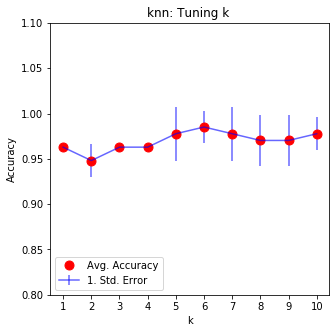

In [16]:
fig = plt.figure(figsize=(5,5))
plt.errorbar(grid_refined, [np.mean(vals) for vals in all_scores], 
             yerr=[np.std(vals) for vals in all_scores], c="blue", label="1. Std. Error", alpha=0.6)
plt.plot(grid_refined,[np.mean(vals) for vals in all_scores], 'ro', label="Avg. Accuracy", markersize=9)
# Uncomment to see standard error bounds of the best model: 
# plt.plot(grid_refined, np.repeat(best_new_accuracy+np.std(all_scores[new_chosen_k-1]), 10), "g--")
# plt.plot(grid_refined, np.repeat(best_new_accuracy-np.std(all_scores[new_chosen_k-1]), 10), "g--")
plt.xticks(grid_refined)
plt.xlabel('k')
t = plt.title('knn: Tuning k ')
plt.ylim(0.8, 1.1)
plt.ylabel("Accuracy")
plt.legend(loc=3)
plt.show()

In [17]:
# Performance of the best model on test set: 
knn_final = KNeighborsClassifier(n_neighbors=new_chosen_k)
knn_final.fit(X_trainvalid, y_trainvalid)
knn_final.score(X_test, y_test)

0.9333333333333333

There is a function in scikit-learn that allows performing grid search automatically. Such function is [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). The inputs of the functions are: 
* estimator: the algorithm to be evaluated 
* parameter_grid: the grid over which to perform the search 
* scoring: the scoring method, as seen for the cross_val_score function
* cv: the cross-validation option (it works exactly as in cross_val_score)

After finding the best parameter set, the function works as a proper estimator; that is, we can use the `fit`, `predict` and `score` methods with it. Training and prediction will be automatically performed with the parameter set that yields the best cross-validation result. The grid must be specified as a Python dictionary, in which each key corresponds to the hyperparameter name, and each value to its grid.  

In [18]:
from sklearn.model_selection import GridSearchCV
# A separate validation set is not needed anymore; we use 10% data for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    stratify=y, random_state=1)

param_grid = {"n_neighbors" : np.arange(1, 11, 1)}
# Perform grid search with five-fold cross validation: 
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Test set score:
grid_search.score(X_test,y_test)

0.9333333333333333

As we can see, results match the ones of manual grid search. We can also check the best chosen parameter: 

In [19]:
grid_search.best_params_

{'n_neighbors': 6}

...and the best cross-validation score: 

In [20]:
grid_search.best_score_

0.9851851851851852

It is also possible to obtain the best chosen estimator (which can give us access to learned parameters, feature importances, and so on): 

In [21]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

`GridSearchCV` also gives the possibility to inspect the results within each cross-validation fold, and for each hyperparameter value. This comes in form of a dictionary, so we can turn it into a `pandas` dataframe for a better visualization: 

In [22]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000498,0.000156,0.001503,0.000225,1,{'n_neighbors': 1},0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,1.110223e-16,7
1,0.000487,0.000138,0.001585,0.000216,2,{'n_neighbors': 2},0.962963,0.925926,0.925926,0.962963,0.962963,0.948148,1.814437e-02,10
2,0.000578,0.000163,0.001707,0.000312,3,{'n_neighbors': 3},0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,1.110223e-16,7
3,0.000392,0.000020,0.001440,0.000039,4,{'n_neighbors': 4},0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,1.110223e-16,7
4,0.000410,0.000016,0.001487,0.000043,5,{'n_neighbors': 5},0.925926,1.000000,1.000000,0.962963,1.000000,0.977778,2.962963e-02,2
5,0.000470,0.000094,0.001606,0.000184,6,{'n_neighbors': 6},0.962963,1.000000,1.000000,0.962963,1.000000,0.985185,1.814437e-02,1
6,0.000356,0.000004,0.001347,0.000009,7,{'n_neighbors': 7},0.925926,1.000000,1.000000,0.962963,1.000000,0.977778,2.962963e-02,2
7,0.000348,0.000014,0.001361,0.000040,8,{'n_neighbors': 8},0.925926,0.962963,1.000000,0.962963,1.000000,0.970370,2.771598e-02,5
8,0.000369,0.000080,0.001296,0.000100,9,{'n_neighbors': 9},0.925926,0.962963,1.000000,0.962963,1.000000,0.970370,2.771598e-02,5
9,0.000312,0.000009,0.001198,0.000038,10,{'n_neighbors': 10},0.962963,0.962963,1.000000,0.962963,1.000000,0.977778,1.814437e-02,4


Each row corresponds to a different hyperparameter value; each column corresponds to various cross-validation results (estimation times, fold-specific results, average score and scores standard deviations, and final rank of the parameter value).

**Note on Grid Search**: if you see that the cross-validation model performance keeps improving at extreme values of the grid (for instance, the error keeps decreasing or the $f_1$ score keeps increasing), you should expand the grid with values that are beyond that extreme. 

In the examples of the notebook "Cross-Validation in Practice", we will see how to perform grid search with estimators that have more than one hyperparameter that must be tuned. You can find more on grid search in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search). 
***

**Random Search**. Instead of specifying a list of hyperparameter values, we can try a random search. The principle of random search is similar to the one of grid search, but in this case the algorithm searches automatically for optimal values across the hyperparameter space. 

In particular, we can assign a probability distribution to each hyperparameter, and let the algorithm pick values at random from such distributions. The main advantage is that you don't need to specify a grid of value for all hyperparameters, and so there is no need to explore all their possible combinations. It seems clear that this method is preferable when an algorithm has many (two or more) hyperparameters that need to be optimized. However, you need to specify the probability distributions for all hyperparameters. The parameters of such distributions, in general, will specify the main location and variability of such search. The distribution must be defined within the same range of admissible values of the hyperparameters (for example: a hyperparameter that can only be a positive real number can be assigned to a Gamma, or Exponential, distribution).

In scikit-learn this can be implemented with the `RandomizedSearchCV` function. It works similarly to `GridSearchCV`, but instead of a parameter grid it takes a dictionary of probability distributions (which are available, for instance, in the `scipy.stats` module). This parameter is called `param_distributions`. Alternatively, values can be given in form of a list, in which case `RandomizedSearchCV` will draw values *without replacement*. Furthermore, the function also takes a `n_iter` argument, which specifies how many values must be drawn from the specified distribution(s). See the `scikit-learn` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) for more information.

Here, we see an example of randomized parameter search for $k$ in k-nearest-neighbors. We use 30 draws from a discrete uniform distribution over the space $k \in \{1,...,50\}$ to perform the search; therefore, we specify a list of values between 1 and 50 (so that values can be drawn without replacement, as this is the only one parameter we are tuning). 

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# param_grid: range of values for sampling without replacement
param_grid = {'n_neighbors': np.arange(1, 51, 1)}
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, 
                                   n_iter=30, cv=5, random_state=1)
random_search.fit(X_train, y_train)
# Test set score:
random_search.score(X_test,y_test)

0.9333333333333333

The function returns the same types of values as `GridSearchCV`: 

In [24]:
random_search.best_params_

{'n_neighbors': 5}

We can visualize the values drawn for $k$: 

In [25]:
results = pd.DataFrame(random_search.cv_results_)
np.sort(np.unique([list((results["params"][x].values()))[0] for x in range(30)]))

array([ 3,  4,  5, 11, 14, 15, 18, 20, 22, 23, 24, 25, 27, 28, 30, 31, 32,
       33, 34, 36, 37, 39, 40, 41, 42, 43, 46, 47, 49, 50])

And the results: 

In [26]:
display(results.sort_values(["param_n_neighbors"]).head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.000581,0.000201,0.001754,0.000135,3,{'n_neighbors': 3},0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,1.110223e-16,6
5,0.000397,0.000030,0.001448,0.000082,4,{'n_neighbors': 4},0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,1.110223e-16,6
25,0.000305,0.000005,0.001153,0.000028,5,{'n_neighbors': 5},0.925926,1.000000,1.000000,0.962963,1.000000,0.977778,2.962963e-02,1
29,0.000299,0.000001,0.001158,0.000008,11,{'n_neighbors': 11},0.962963,0.962963,1.000000,0.962963,1.000000,0.977778,1.814437e-02,2
19,0.000313,0.000024,0.001182,0.000016,14,{'n_neighbors': 14},0.962963,0.962963,1.000000,0.962963,0.962963,0.970370,1.481481e-02,4


For completeness, it is shown here how to perform random search with a probability distribution. Here, we use the discrete uniform distribution provided with the `scipy.stats.randint` [function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html). 20 draws will be performed.  

In [27]:
from  scipy import stats
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors': stats.randint(1, 50)}
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, 
                                   n_iter=20, cv=5, random_state=1)
random_search.fit(X_train, y_train)
# Test set score:
random_search.score(X_test,y_test)

0.9333333333333333

In [28]:
# Display the results of RandomizedSearchCV(); as you can see, some parameter values are duplicated 
results = pd.DataFrame(random_search.cv_results_)
display(results.sort_values(["param_n_neighbors"]).head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.000305,4.125675e-06,0.001094,0.000004,1,{'n_neighbors': 1},0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,1.110223e-16,11
10,0.000300,4.101908e-07,0.001167,0.000092,2,{'n_neighbors': 2},0.962963,0.925926,0.925926,0.962963,0.962963,0.948148,1.814437e-02,13
6,0.000329,1.130718e-05,0.001260,0.000051,6,{'n_neighbors': 6},0.962963,1.000000,1.000000,0.962963,1.000000,0.985185,1.814437e-02,1
14,0.000306,9.250641e-06,0.001251,0.000140,7,{'n_neighbors': 7},0.925926,1.000000,1.000000,0.962963,1.000000,0.977778,2.962963e-02,2
12,0.000303,6.021379e-06,0.001223,0.000165,8,{'n_neighbors': 8},0.925926,0.962963,1.000000,0.962963,1.000000,0.970370,2.771598e-02,8
3,0.000380,2.523428e-05,0.001450,0.000131,9,{'n_neighbors': 9},0.925926,0.962963,1.000000,0.962963,1.000000,0.970370,2.771598e-02,8
4,0.000363,1.286754e-05,0.001371,0.000021,10,{'n_neighbors': 10},0.962963,0.962963,1.000000,0.962963,1.000000,0.977778,1.814437e-02,3
5,0.000354,8.991131e-06,0.001338,0.000033,12,{'n_neighbors': 12},0.962963,0.962963,1.000000,0.962963,1.000000,0.977778,1.814437e-02,3
2,0.000482,6.869080e-05,0.001688,0.000081,13,{'n_neighbors': 13},0.962963,0.962963,1.000000,0.962963,1.000000,0.977778,1.814437e-02,3
11,0.000370,7.939970e-05,0.001219,0.000067,13,{'n_neighbors': 13},0.962963,0.962963,1.000000,0.962963,1.000000,0.977778,1.814437e-02,3
